## HW 4 


### Differential Gene Expression in Acute Myocardial Infraction

ID #1:205570989

ID #2:313288284

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import scipy
import seaborn as sns

In [2]:



from scipy.stats import kendalltau


#### Data import 

In [3]:
df = pd.read_csv(r"C:\Users\יונתן דרפל\Desktop\לימודים\תואר שני -דאטה סינאס\סטטיסטיקה וניתוח נתונים\שיעורי בית\HW4\data.csv",skiprows=58, low_memory=False)

In [4]:
# Data DataFrame
header = df.iloc[0]
data = df[1:] 
data.columns = header
data

,Class,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
2,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
3,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
4,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
5,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54672,AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
54673,AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
54674,AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
54675,AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


 ### 3 a. High level description of the data and some pre-processing

#### 1 How many genes profiled?

In [5]:
print('There are {} profiled genes'.format(data.shape[0] - 1))

There are 54675 profiled genes


#### 2. How many samples (subjects/patients) in total?

In [6]:
print('There are {} patients'.format(data.shape[1] - 1))

There are 99 patients


#### 3.How many samples in each class?

In [7]:
nd = data.transpose()
nd=nd.reset_index()
t_header = nd.iloc[0]
t_data = nd[1:] 
t_data.columns = t_header



In [8]:
t_data

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.601745953,5.94230757,7.290513508,8.988510881,5.567947288,5.558780351,5.429436708,4.487940292,4.254285925,5.375810973
96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.2710373,14.16370633,14.88450605,14.79250553,4.902195229,3.416999272,2.834741433,2.782355764,3.882079933,3.744138165
97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.89861618,13.68242475,14.88450605,14.78380144,5.239906199,3.699181146,3.24968301,3.056726837,3.649826789,4.021536308
98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.84700646,13.55159338,14.85806628,14.7781659,4.556134169,3.48527965,2.71141329,2.833818355,3.523410023,3.81256443


In [9]:
print(t_data[t_data.Class == 'H'].count())
print(t_data[t_data.Class == 'M'].count())

0
Class              50
ID_REF             50
1007_s_at          50
1053_at            50
117_at             50
                   ..
AFFX-ThrX-5_at     50
AFFX-ThrX-M_at     50
AFFX-TrpnX-3_at    50
AFFX-TrpnX-5_at    50
AFFX-TrpnX-M_at    50
Length: 54677, dtype: int64
0
Class              49
ID_REF             49
1007_s_at          49
1053_at            49
117_at             49
                   ..
AFFX-ThrX-5_at     49
AFFX-ThrX-M_at     49
AFFX-TrpnX-3_at    49
AFFX-TrpnX-5_at    49
AFFX-TrpnX-M_at    49
Length: 54677, dtype: int64


#### There 50 Healthy  and 49 Sick 

### 4. data cleaning 

In [10]:
c_data = t_data.dropna(axis=1, inplace=False)
c_data.shape

(99, 54630)

##### there are 54630 genes after the cleanup of empty cells 

### 5.histograms comparing expression levels


In [11]:

h_data = c_data.sample(n=20,axis=1,random_state=1)
h_data.insert(0,"Class",c_data['Class'],True)

In [12]:
h_data1 =h_data[h_data.Class == 'H']
h_data2 =h_data[h_data.Class == 'M']
h_data1_f = h_data1.drop('Class', 1)
h_data2_f = h_data2.drop('Class', 1)
h_data2_f.head() 

,1555735_a_at,214360_at,219655_at,1564672_at,219014_at,207767_s_at,223264_at,1552368_at,1561320_at,233614_at,1563070_at,219587_at,210347_s_at,213733_at,1554302_s_at,34689_at,203515_s_at,225955_at,226517_at,203883_s_at
14,6.792584232,6.248699811,4.658417959,3.053922811,10.37154447,3.384696715,6.18077283,2.517395794,5.769141533,9.76758694,4.363340363,7.071304267,5.294002717,8.240693682,4.028204446,8.46982422,8.185077121,7.017652091,6.906866373,8.833962137
15,5.768217125,7.223986634,4.866372557,2.810744268,11.50732224,3.550883052,6.687950986,2.903761277,5.90550687,10.02990788,5.58910362,6.976151234,7.061628127,8.635734493,3.58674565,7.950766168,8.956781574,7.962938343,5.886158761,8.119242754
16,6.191841126,5.980242231,4.186599904,4.25119777,10.49424346,3.325414559,6.81227344,2.4894369,5.953957858,9.807602663,4.798563769,6.033276674,3.921300242,8.372179214,4.234612048,10.31762585,8.556957549,8.373952882,6.852673815,8.973221695
17,6.312620388,7.248961848,4.096204299,3.185637984,11.43735017,3.40808565,6.074270328,3.005749487,5.547709421,10.31615208,4.650559668,7.116287856,5.565219051,8.901706235,4.270926613,8.662081807,9.110315511,8.583341994,7.302979438,8.328533663
18,6.696771896,7.213755217,4.016446557,2.926804947,11.26765407,3.276501718,6.711544631,2.502834487,5.684601604,10.34056007,4.788436548,7.102392866,6.364434078,9.237006415,3.316537915,8.609790339,9.063708699,9.718520606,8.214442407,8.272487996


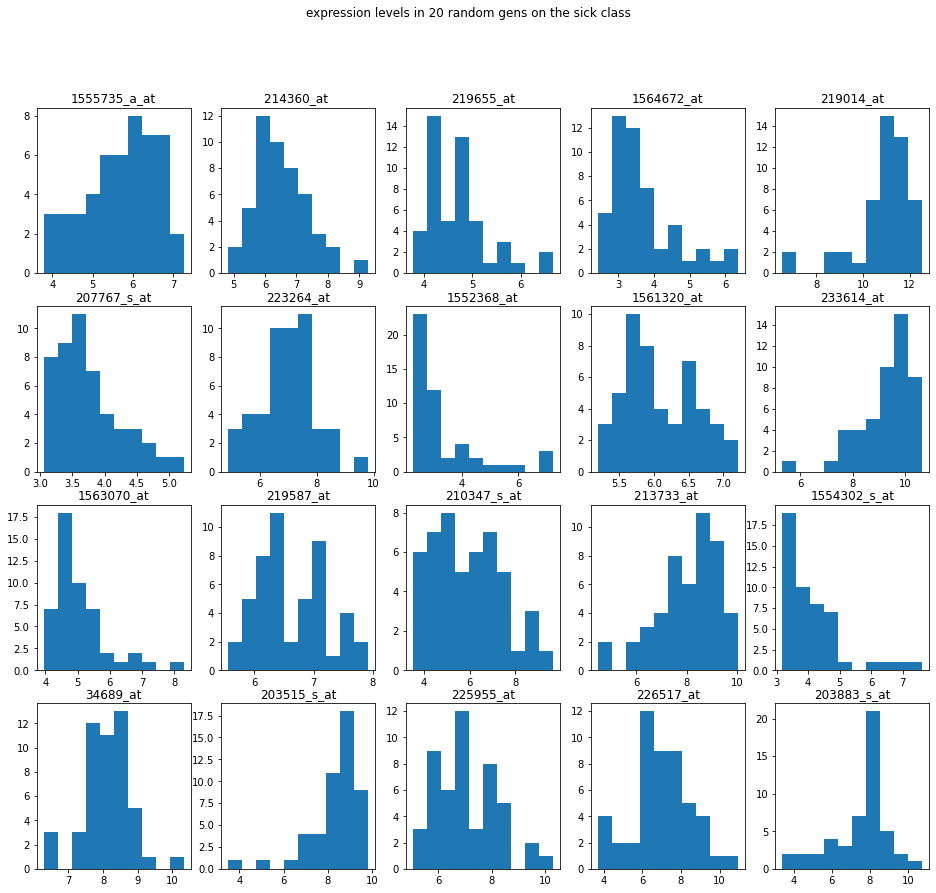

In [13]:
fig, axes = plt.subplots(4, 5, figsize=(16,14))
fig.suptitle('expression levels in 20 random gens on the sick class') 


axes[0,0].hist(h_data2_f['1555735_a_at'].astype('float'))
axes[0,0].set_title("1555735_a_at")

axes[0,1].hist(h_data2_f['214360_at'].astype('float'))
axes[0,1].set_title("214360_at ")

axes[0,2].hist(h_data2_f['219655_at'].astype('float'))
axes[0,2].set_title("219655_at")

axes[0,3].hist(h_data2_f['1564672_at'].astype('float'))
axes[0,3].set_title("1564672_at")

axes[0,4].hist(h_data2_f['219014_at'].astype('float'))
axes[0,4].set_title("219014_at")

axes[1,0].hist(h_data2_f['207767_s_at'].astype('float'))
axes[1,0].set_title("207767_s_at")

axes[1,1].hist(h_data2_f['223264_at'].astype('float'))
axes[1,1].set_title("223264_at")

axes[1,2].hist(h_data2_f['1552368_at'].astype('float'))
axes[1,2].set_title("1552368_at")

axes[1,3].hist(h_data2_f['1561320_at'].astype('float'))
axes[1,3].set_title("1561320_at")

axes[1,4].hist(h_data2_f['233614_at'].astype('float'))
axes[1,4].set_title("233614_at")

axes[2,0].hist(h_data2_f['1563070_at'].astype('float'))
axes[2,0].set_title("1563070_at")

axes[2,1].hist(h_data2_f['219587_at'].astype('float'))
axes[2,1].set_title("219587_at")

axes[2,2].hist(h_data2_f['210347_s_at'].astype('float'))
axes[2,2].set_title("210347_s_at")

axes[2,3].hist(h_data2_f['213733_at'].astype('float'))
axes[2,3].set_title("213733_at ")

axes[2,4].hist(h_data2_f['1554302_s_at'].astype('float'))
axes[2,4].set_title("1554302_s_at")

axes[3,0].hist(h_data2_f['34689_at'].astype('float'))
axes[3,0].set_title("34689_at")

axes[3,1].hist(h_data2_f['203515_s_at'].astype('float'))
axes[3,1].set_title("203515_s_at")

axes[3,2].hist(h_data2_f['225955_at'].astype('float'))
axes[3,2].set_title("225955_at")

axes[3,3].hist(h_data2_f['226517_at'].astype('float'))
axes[3,3].set_title("226517_at")

axes[3,4].hist(h_data2_f['203883_s_at'].astype('float'))
axes[3,4].set_title("203883_s_at")


plt.show()


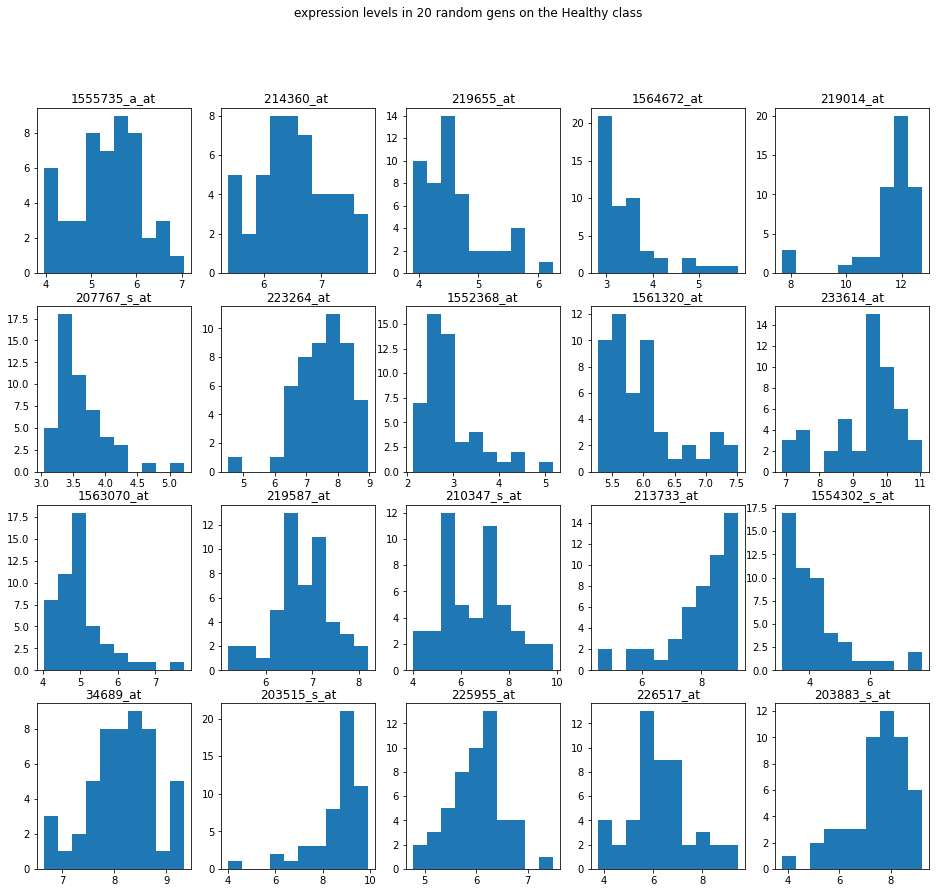

In [14]:
fig, axes = plt.subplots(4, 5, figsize=(16,14))
fig.suptitle('expression levels in 20 random gens on the Healthy class') 


axes[0,0].hist(h_data1_f['1555735_a_at'].astype('float'))
axes[0,0].set_title("1555735_a_at")

axes[0,1].hist(h_data1_f['214360_at'].astype('float'))
axes[0,1].set_title("214360_at ")

axes[0,2].hist(h_data1_f['219655_at'].astype('float'))
axes[0,2].set_title("219655_at")

axes[0,3].hist(h_data1_f['1564672_at'].astype('float'))
axes[0,3].set_title("1564672_at")

axes[0,4].hist(h_data1_f['219014_at'].astype('float'))
axes[0,4].set_title("219014_at")

axes[1,0].hist(h_data1_f['207767_s_at'].astype('float'))
axes[1,0].set_title("207767_s_at")

axes[1,1].hist(h_data1_f['223264_at'].astype('float'))
axes[1,1].set_title("223264_at")

axes[1,2].hist(h_data1_f['1552368_at'].astype('float'))
axes[1,2].set_title("1552368_at")

axes[1,3].hist(h_data1_f['1561320_at'].astype('float'))
axes[1,3].set_title("1561320_at")

axes[1,4].hist(h_data1_f['233614_at'].astype('float'))
axes[1,4].set_title("233614_at")

axes[2,0].hist(h_data1_f['1563070_at'].astype('float'))
axes[2,0].set_title("1563070_at")

axes[2,1].hist(h_data1_f['219587_at'].astype('float'))
axes[2,1].set_title("219587_at")

axes[2,2].hist(h_data1_f['210347_s_at'].astype('float'))
axes[2,2].set_title("210347_s_at")

axes[2,3].hist(h_data1_f['213733_at'].astype('float'))
axes[2,3].set_title("213733_at ")

axes[2,4].hist(h_data1_f['1554302_s_at'].astype('float'))
axes[2,4].set_title("1554302_s_at")

axes[3,0].hist(h_data1_f['34689_at'].astype('float'))
axes[3,0].set_title("34689_at")

axes[3,1].hist(h_data1_f['203515_s_at'].astype('float'))
axes[3,1].set_title("203515_s_at")

axes[3,2].hist(h_data1_f['225955_at'].astype('float'))
axes[3,2].set_title("225955_at")

axes[3,3].hist(h_data1_f['226517_at'].astype('float'))
axes[3,3].set_title("226517_at")

axes[3,4].hist(h_data1_f['203883_s_at'].astype('float'))
axes[3,4].set_title("203883_s_at")


plt.show()


##### b. WRS for differential expression (DE)

Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

 

1.

$$E[RS(g)]= \frac{B(N+1)}{2} = \frac{B(M_{count} +1)}{2} = \frac{49·100}{2} =2450$$


2.
We assum that all ranks are distributed uniformly , that why we will chose $49$ ranks 
 $$ \sum^{49}_{i=1} RS(g) = \frac{n(n+1)}{2} =\frac{49(50)}{2} = 1225 $$

3.
All genes have the same probability to get any rank under the null hypothesis.
we have $49$ sick patients ,in total there are $ {99 \choose 49} $ ranks to choose from. then:$$ P[RS(g) = c] = \frac{1}{{99 \choose 49}} $$

4. for $RS(g) = c - 1 $, we will get the answer as above but we need to  decrease the rank by 1 and $$ P[RS(g) = c] = \frac{1}{{99 \choose 48}} $$

For $RS(g) = c - 2 $, we will get same answer as above but we need to  decrease the rank by 2, thus:$$ P[RS(g) = c] = \frac{2}{{99 \choose 47}} $$

#### 5. histogram of the values of RS(g) in the dataset

In [15]:
def rank_sick(gene):
    rank = gene.rank()
    return (rank[c_data['Class'] == "M"].sum()) ## only sick


r_data = c_data.iloc[:,2:].apply(rank_sick, axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


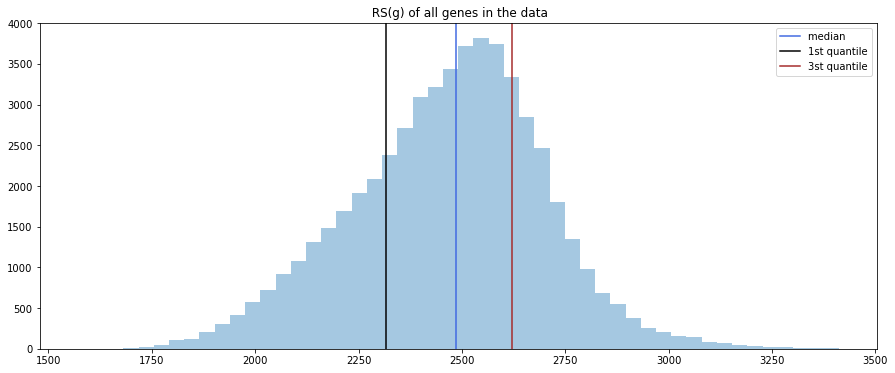

In [16]:
r_data.quantile([0.25, 0.75], interpolation='nearest')
x_25 = 2317
x_75 = 2621
from scipy.stats import iqr
plt.figure(figsize=(15,6))
sns.distplot(r_data, kde = False)
plt.title(" RS(g) of all genes in the data")
plt.axvline(r_data.median(),label="median ", color = "royalblue")
plt.axvline(x_25,label="1st quantile", color = 'black')
plt.axvline(x_75,label="3st quantile", color = "brown")
plt.legend()
plt.show()






### C.Differential Expression


#### 1. first we will use student T-test 


In [17]:
def calc_ttest(gene):
    a = gene[c_data['Class'] == "M"].astype("float")
    b = gene[c_data['Class'] == "H"].astype("float")
    return stats.ttest_ind(a,b)

t_test = c_data.iloc[:,2:].apply(calc_ttest, axis=0,result_type="expand")


In [18]:
t_test

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,-1.278585,0.447602,4.041393,0.102599,0.481005,-1.25881,-2.885473,2.406316,-2.154836,-4.055713,...,-0.616825,-0.838321,-0.598171,-0.755246,2.221230,1.108412,0.961627,1.051736,0.617371,1.471453
1,0.204094,0.655439,0.000106,0.918493,0.631596,0.21112,0.004817,0.018008,0.033650,0.000101,...,0.538795,0.403911,0.551120,0.451931,0.028661,0.270425,0.338628,0.295534,0.538437,0.144406


#### overexpressed and underexpressed  genes in M vs H at a p-value better (≤) than 0.07


In [19]:
alpha = 0.07*2    #(we double the alpha due the fact that the Ttest&WRS funcion return p-value*2)
t_test_over = t_test.T[(t_test.T.iloc[:,0] > 0) & (t_test.T.iloc[:,1] <= alpha)] 
t_test_under = t_test.T[(t_test.T.iloc[:,0] <= 0) & (t_test.T.iloc[:,1] <= alpha)]


In [20]:
print(t_test_over.shape[0])
print(t_test_under.shape[0])
print('we got 8517 overexpressed Genes and 8639 underexpressed Genes from the student T-test ')

8517
8639
we got 8517 overexpressed Genes and 8639 underexpressed Genes from the student T-test 


#### 2. now we will use WRS


In [21]:
def wrs(gene):
    c = gene[c_data['Class'] == "M"]
    d = gene[c_data['Class'] == "H"]
    return stats.ranksums(c,d)

wrs_d = c_data.iloc[:,2:].apply(wrs, axis=0, result_type="expand")
wrs_d

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,-1.021787,1.077775,3.590252,0.629869,1.035784,-0.993793,-3.079359,1.686649,1.728640,-3.681233,...,0.720850,0.566882,1.011289,1.525682,2.365507,2.281525,2.204541,1.574672,1.469694,1.672652
1,0.306882,0.281134,0.000330,0.528780,0.300303,0.320324,0.002074,0.091671,0.083874,0.000232,...,0.471002,0.570794,0.311878,0.127089,0.018005,0.022517,0.027486,0.115332,0.141645,0.094396


In [22]:
wrs_over = wrs_d.T[(wrs_d.T.iloc[:,0] > 0) & (wrs_d.T.iloc[:,1] <= alpha)]
wrs_under = wrs_d.T[(wrs_d.T.iloc[:,0] <= 0) & (wrs_d.T.iloc[:,1] <= alpha)]
print('we got 10338 overexpressed genes and 9336 underexpressed genes from the student WRS ')
print(wrs_over.shape[0])
print(wrs_under.shape[0])

we got 10338 overexpressed genes and 9336 underexpressed genes from the student WRS 
10338
9336


### d. Correlations

#### crate D

In [23]:
num_sig_pairs = 160
significantly_underexpressed = wrs_over.sort_values(by=wrs_over.columns[1]).head(80)
significantly_overexpressed = wrs_under.sort_values(by=wrs_under.columns[1]).head(80)
D = significantly_underexpressed.append(significantly_overexpressed)
print(D)

                    0             1
0                                  
201859_at    6.725599  1.748716e-11
202464_s_at  6.634618  3.253441e-11
235536_at    6.480650  9.132830e-11
215001_s_at  6.480650  9.132830e-11
217202_s_at  6.480650  9.132830e-11
...               ...           ...
229223_at   -4.696022  2.652773e-06
222893_s_at -4.689023  2.745122e-06
220354_at   -4.689023  2.745122e-06
218338_at   -4.682025  2.840553e-06
238590_x_at -4.675026  2.939162e-06

[160 rows x 2 columns]


#### 1. Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap. 




In [24]:
gene_id = list(D.index.values)
D = c_data.filter(gene_id, axis=1).astype('float')
D_kendall_corr = D.corr(method='kendall')

In [25]:
D_kendall_corr # cor matrix

,201859_at,202464_s_at,235536_at,215001_s_at,217202_s_at,211302_s_at,202672_s_at,1558299_at,201473_at,239085_at,...,1554116_s_at,203476_at,223351_at,209176_at,229364_at,229223_at,222893_s_at,220354_at,218338_at,238590_x_at
0,,,,,,,,,,,,,,,,,,,,,
201859_at,1.000000,0.551020,0.429808,0.689136,0.505669,0.484230,0.396825,0.396825,0.656840,0.320140,...,-0.165945,-0.081427,-0.158524,-0.148217,-0.216656,-0.210884,-0.146980,-0.396413,0.146568,-0.155638
202464_s_at,0.551020,1.000000,0.459081,0.554319,0.404659,0.436817,0.370027,0.296640,0.570250,0.260359,...,-0.129252,-0.122243,-0.227376,-0.214595,-0.113173,-0.096681,-0.197691,-0.321789,0.209647,-0.160173
235536_at,0.429808,0.459081,1.000000,0.427335,0.490414,0.526696,0.362606,0.282622,0.502216,0.324675,...,-0.198516,-0.384457,-0.039373,-0.183261,-0.044733,-0.020820,-0.117708,-0.155226,0.020820,-0.108225
215001_s_at,0.689136,0.554319,0.427335,1.000000,0.517213,0.439703,0.368790,0.404247,0.618905,0.358071,...,-0.154401,-0.122655,-0.123892,-0.108637,-0.191919,-0.170480,-0.145331,-0.332096,0.141620,-0.127603
217202_s_at,0.505669,0.404659,0.490414,0.517213,1.000000,0.473098,0.386518,0.445887,0.557468,0.447537,...,-0.199340,-0.265718,-0.146568,-0.214595,-0.231086,-0.189033,-0.228200,-0.223665,0.014224,-0.203875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229223_at,-0.210884,-0.096681,-0.020820,-0.170480,-0.189033,-0.207998,-0.296228,-0.312719,-0.148026,-0.240157,...,0.350649,0.097093,0.470212,0.341991,0.525871,1.000000,0.458668,0.330447,0.130489,0.376623
222893_s_at,-0.146980,-0.197691,-0.117708,-0.145331,-0.228200,-0.194393,-0.304061,-0.327974,-0.140604,-0.277675,...,0.257060,0.215420,0.472274,0.481756,0.475160,0.458668,1.000000,0.266543,0.160585,0.475984
220354_at,-0.396413,-0.321789,-0.155226,-0.332096,-0.223665,-0.257473,-0.324263,-0.236034,-0.268426,-0.233560,...,0.172542,0.042672,0.324263,0.241394,0.262832,0.330447,0.266543,1.000000,-0.063286,0.207586


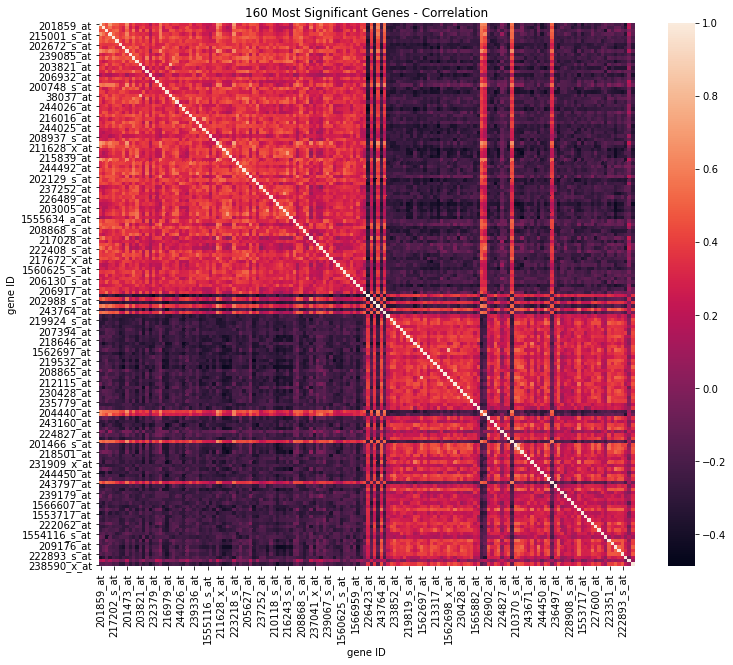

In [26]:
plt.figure(figsize = (12,10))
sns.heatmap(D_kendall_corr)
plt.title("160 Most Significant Genes - Correlation")
plt.xlabel("gene ID")
plt.ylabel("gene ID")
plt.show()

2) Under a NULL model that assumes that genes are pairwise
independent, what is the expected value for 𝜏? What is the observed
mean of the numbers you calculated in the above section?


### The τ value of two variables approaches 0 as the disorder or independence between their compared ranks increases.
 

#### Observed mean :

In [27]:
c2 = D_kendall_corr.copy()
c2.values[np.tril_indices_from(c2)] = np.nan
c2.unstack().mean()

0.048315257959770395

3) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression
levels of genes, across a set of samples)? Do we observe any
significant co-expression? Explain your answer.


### From a quick look at the heat map we did in section 1,we can observe that it quite symmetric , Which means strong corrlation in genes that have strong expression level and the other why around 

4) How many co-expressed pairs do we observe in FDR=0.05?

In [28]:
def ce_pvals(data):
    pvalues=[]
    for i ,columns in enumerate(data.columns):
        for j,columns in enumerate(data.columns):
            if i<=j:
                continue
            else:
                tau,pval=stats.kendalltau(data.iloc[:,i],data.iloc[:,j])
                if tau>0:
                    pvalues.append(pval)
    pvalues.sort()
    return pvalues   

            

In [29]:
def fdr_semples(pvalues,fdr_val=0.05):
    samples =0
    for i,pval in enumerate(pvalues):
        expexted = pval*len(pvalues)
        observed =i+1
        fdr =expexted/observed
        if fdr <= fdr_val:
            samples= observed
    return samples

In [30]:
pvalues = ce_pvals(D)
fdr_semples(pvalues,fdr_val=0.05)
    

6122

### 6122 co-expressed pairs in a FDR=0.05

5) What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather than
only for genes in D?

### If we will computing co-expression for all genes in the study, the advanages are that we will not miss any potential data and we will chack all the genes avilable , and on the other hand the big disadvantages in thet aprroach is that it will take a very long time to compute because the data set contains 54675 sampels of diffrent genes.

6) Perform the above steps on the same set D, but restrict
attention only to samples labeled M. What do you see now?
Can you explain this?

In [44]:
d_df_m =D.loc[c_data['Class']=='M']
d_df_m
D_kendall_M = d_df_m.corr(method='kendall')

1.

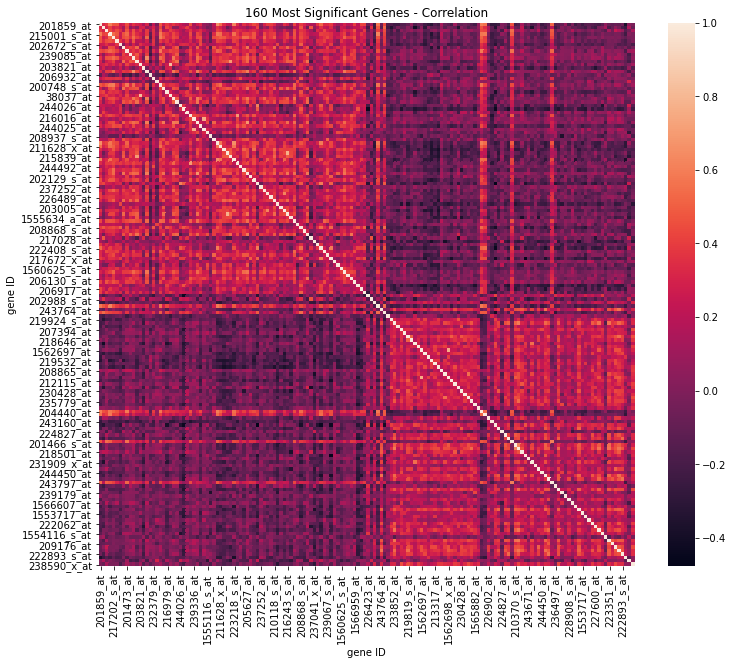

In [45]:
plt.figure(figsize = (12,10))
sns.heatmap(D_kendall_M)
plt.title("160 Most Significant Genes - Correlation")
plt.xlabel("gene ID")
plt.ylabel("gene ID")
plt.show()

2.

In [46]:
c3 = D_kendall_M.copy()
c3.values[np.tril_indices_from(c3)] = np.nan
c3.unstack().mean()

0.0787221717094511

3.

In [47]:
avg_over_cor=abs(D_kendall_M.iloc[0:80,0:80]).mean().mean()
avg_under_cor =abs(D_kendall_M.iloc[80:160,80:160]).mean().mean()
print(avg_over_cor)
print(avg_under_cor )

0.25238888140603716
0.21780747122901367


4.

In [48]:
pvalues = ce_pvals(d_df_m)
fdr_semples(pvalues,fdr_val=0.05)

3319

## E. Plots and Conclusions of the DE and correlation analysis
1) Construct the DE overabundance plots (blue and green lines
as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the results
you had computed in Section 3c.
State, for each comparison, the number of genes, k, at which
we observe:


###### a) FDR = 0.05
###### b) FDR = 0.01
###### c) FDR = 0.005


In [34]:
def get_pvals(df, test):  
    healthy = df.loc[df['Class']=='H'].drop(['Class','ID_REF'], axis=1)
    sick = df.loc[df['Class']=='M'].drop(['Class','ID_REF'], axis=1)    
    
    pvals = []
    for column in df.drop(['Class','ID_REF'], axis=1).columns[:-1]:
        if test == "ttest":
            pvals.append(stats.ttest_ind(healthy[column].astype(float), sick[column].astype(float))[1])
        elif test == "WRS":
            pvals.append(stats.ranksums(healthy[column],sick[column])[1])        
            
    return pvals

In [35]:
def calc_fdr(df, test, ks=[0.05, 0.01, 0.005]):
    epsilon = 1e-9
    
    pvals = pd.Series(get_pvals(df,test))
    ranks = pvals.rank(method='max')
    expected = pvals * len(pvals)
    fdr = expected / ranks
    
    plt.scatter(pvals, ranks, label="observed ranks")
    plt.scatter(pvals, expected, label="expected ranks",color="green")
    plt.legend()
    plt.show()
    
    for k in ks:
        num = fdr[fdr <= k + epsilon].count()
        print(f"Number of genes with fdr <= {k} is {num}")

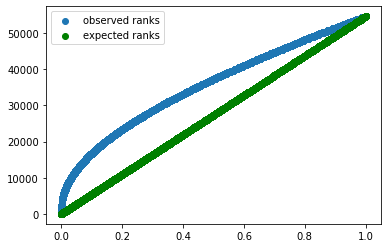

Number of genes with fdr <= 0.05 is 4221
Number of genes with fdr <= 0.01 is 1623
Number of genes with fdr <= 0.005 is 1069


In [36]:
calc_fdr(c_data, "WRS")

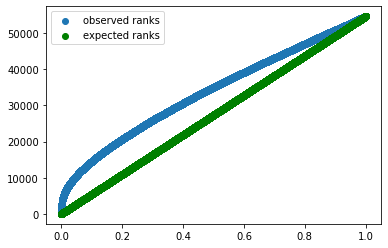

Number of genes with fdr <= 0.05 is 3970
Number of genes with fdr <= 0.01 is 1987
Number of genes with fdr <= 0.005 is 1588


In [37]:
calc_fdr(c_data, "ttest")

2. Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation of
their expression patterns that demonstrates the observed DE.

In [38]:
def boxplot_significant(df):
    for i in range(3):
        t = df[[gene_id[i], "Class"]]
        convert_dict = {gene_id[i]: float}
        t = t.astype(convert_dict)
        sns.violinplot(x=t.columns[1], y=t.columns[0], data=t).set_title(f"Gene expression for {gene_id[i]} in healthy vs sick")
        plt.show()

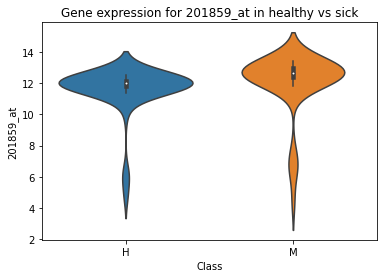

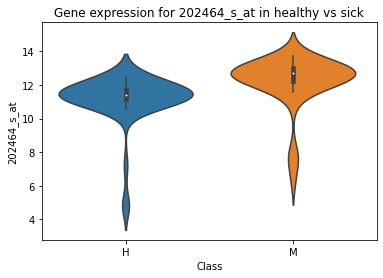

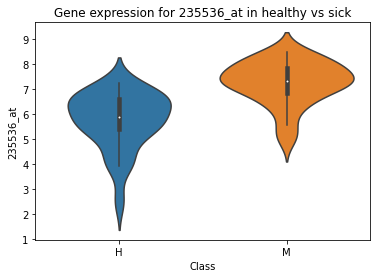

In [39]:
boxplot_significant(c_data)

3) Heatmap
Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.

In [40]:
gene_id.append('Class')

#### 160 Genes from section D

In [41]:
gene_id

['201859_at',
 '202464_s_at',
 '235536_at',
 '215001_s_at',
 '217202_s_at',
 '211302_s_at',
 '202672_s_at',
 '1558299_at',
 '201473_at',
 '239085_at',
 '241279_at',
 '1555643_s_at',
 '203821_at',
 '205239_at',
 '228758_at',
 '206932_at',
 '232379_at',
 '227681_at',
 '200748_s_at',
 '202895_s_at',
 '216979_at',
 '38037_at',
 '235641_at',
 '205931_s_at',
 '244026_at',
 '214445_at',
 '218880_at',
 '216016_at',
 '239336_at',
 '206733_at',
 '244025_at',
 '215775_at',
 '1555116_s_at',
 '208937_s_at',
 '228648_at',
 '202644_s_at',
 '211628_x_at',
 '239704_at',
 '216245_at',
 '215839_at',
 '223218_s_at',
 '216015_s_at',
 '244492_at',
 '203853_s_at',
 '205627_at',
 '202129_s_at',
 '1568830_at',
 '240038_at',
 '237252_at',
 '1553723_at',
 '204214_s_at',
 '226489_at',
 '210118_s_at',
 '1554980_a_at',
 '203005_at',
 '228161_at',
 '216243_s_at',
 '1555634_a_at',
 '201887_at',
 '208763_s_at',
 '208868_s_at',
 '219859_at',
 '206120_at',
 '217028_at',
 '237041_x_at',
 '217503_at',
 '222408_s_at',
 '20

In [42]:
H_f = pd.DataFrame(c_data.replace(['H', 'M'], [0, 1]))
H_n = H_f.filter(gene_id, axis=1)
H_n

,201859_at,202464_s_at,235536_at,215001_s_at,217202_s_at,211302_s_at,202672_s_at,1558299_at,201473_at,239085_at,...,203476_at,223351_at,209176_at,229364_at,229223_at,222893_s_at,220354_at,218338_at,238590_x_at,Class
1,12.13682396,11.9195845,6.683342091,12.71221544,6.781218729,7.105602692,4.160499312,5.508650403,10.71940087,5.556872916,...,7.456310747,8.62506561,8.972748062,9.331780446,8.261446395,9.613035343,6.349106264,9.622215333,7.693970366,0
2,12.27700029,11.79424113,5.800307373,12.22759341,6.837767894,6.72878116,4.053127097,5.264155411,10.96585774,5.353908936,...,7.608808893,7.539028933,8.2269504,8.780324552,9.191037229,7.451151681,5.862440285,9.49252864,7.492846613,0
3,12.12495411,12.42470684,7.192862935,12.07482682,6.396830929,8.116321202,4.319974421,5.422422463,11.23802072,4.34539024,...,7.589840755,7.779099558,7.943241576,9.399998117,8.338470439,6.046798484,6.610071841,9.768998015,7.419990401,0
4,11.75753754,10.94719985,6.216138632,11.6629436,6.400286367,5.982087751,3.726347378,5.094422897,11.08289344,4.390250864,...,7.400995211,8.219038548,9.397588655,9.442303589,7.609958531,7.547483513,7.768418555,9.817547819,7.502899623,0
5,11.94207974,11.62783893,6.58045044,12.23718987,6.709850862,7.135622278,3.985023462,5.591925148,11.06406019,5.045855434,...,7.252429908,8.320987044,8.634016842,10.08823068,8.164162476,6.683059682,6.956729376,9.686074139,7.704254369,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.319027131,6.312386182,6.371134695,9.721533186,8.060496283,8.749575405,5.366570445,7.982574937,8.618223004,6.185872872,...,6.371763853,7.263883412,8.657767087,7.204137555,4.957771852,5.147640199,6.966609896,5.18982157,4.66993452,1
96,13.04692122,12.86267464,7.438769304,13.16164938,7.67192045,8.946844336,5.697528091,8.657133562,11.65293216,5.961065902,...,7.840933247,4.696124282,6.403751475,7.520420638,4.704818875,5.384226122,5.702598665,8.727966588,7.122981045,1
97,12.66103717,12.77891502,7.346691661,12.99956499,6.85080913,8.767834011,6.670817265,6.313056667,11.34980932,5.187737169,...,7.239209878,7.582787405,9.129482703,7.388424562,5.87795682,5.397881524,5.386547804,10.44928015,5.669821457,1
98,12.19227987,12.33696232,5.868125742,12.68441304,7.422838281,7.624136596,4.092889951,7.237948134,11.69383707,5.098086349,...,8.218177975,7.289586949,8.832794561,9.065940267,7.791434221,7.234186591,6.35806524,9.601271037,8.536927099,1


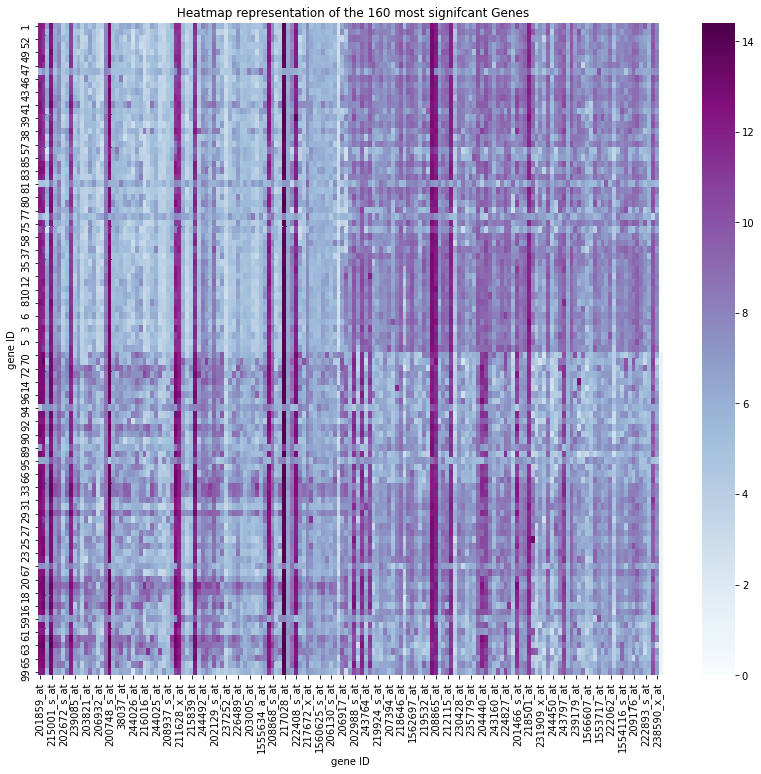

In [43]:
plt.figure(figsize= (14,12))
sns.heatmap(H_n.sort_values('Class',axis=0).astype('float'),cmap="BuPu")
plt.title(" Heatmap representation of the 160 most signifcant Genes")
plt.xlabel("gene ID")
plt.ylabel("gene ID")
plt.show()